In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

In [3]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


x_train = x_train/255
x_test = x_test/255

#are used to normalize the pixel values of the images in the training (x_train) and testing (x_test) datasets

###1.Pixel Intensity Representation:

Most image datasets have pixel values that range from 0 to 255 (for 8-bit images).
By dividing by 255, you scale the pixel values to the range [0,1].

###2.Compatibility with Common Activation Functions:

Common activation functions like sigmoid and ReLU work optimally when inputs are in smaller ranges, such as [0, 1] or [-1, 1].

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

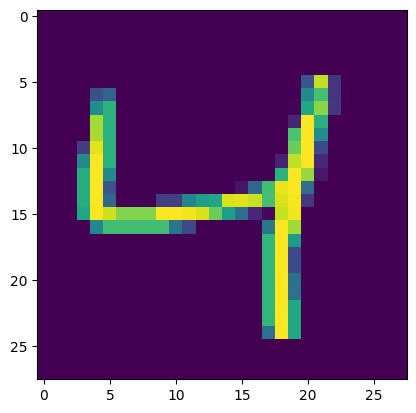

In [7]:
plt.imshow(x_train[2])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

##"Let's convert the dimensions of the array into one dimension and flatten it."

In [9]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)


In [11]:
x_test_flat[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##"Let's build our CNN model for digit recognition."

In [21]:
from tensorflow.keras import layers
model = keras.Sequential([
    #CNN
    layers.Conv2D(filters = 32 , kernel_size=(3,3),input_shape=(28,28,1), activation = 'relu'),

    layers.Flatten(),


    #ANN

    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8990 - loss: 0.3370
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0693
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9858 - loss: 0.0474
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0323
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9948 - loss: 0.0186
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9961 - loss: 0.0138
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9975 - loss: 0.0099
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9977 - loss: 0.0080
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9987 - loss: 0.0053


In [23]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.1030


[0.08153735101222992, 0.9800999760627747]

In [24]:
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(ele) for ele in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
print(f"Classification report  \n:  {classification_report(y_test,y_pred_classes)}")

Classification report  
:                precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



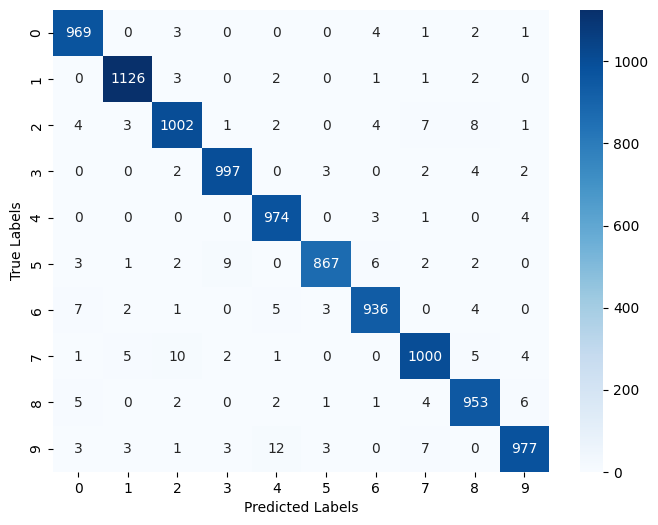

In [29]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create the heatmap plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()